In [1]:
import numpy as np
import os
from sklearn.metrics import confusion_matrix
import seaborn as sn; sn.set(font_scale=1.4)
from sklearn.utils import shuffle           
import matplotlib.pyplot as plt             
import cv2                                 
import tensorflow as tf                
from tqdm import tqdm

In [2]:
class_names = ['Cheetah', 'Jaguar', 'Tiger']
class_names_label = {class_name:i for i, class_name in enumerate(class_names)}

nb_classes = len(class_names)

IMAGE_SIZE = (150, 150)

In [3]:
def load_data():
    """
        Load the data:
            - 14,034 images to train the network.
            - 3,000 images to evaluate how accurately the network learned to classify images.
    """
    
    datasets = ['Train', 'Test']
    output = []
    
    # Iterate through training and test sets
    for dataset in datasets:
        
        images = []
        labels = []
        
        print("Loading {}".format(dataset))
        
        # Iterate through each folder corresponding to a category
        for folder in os.listdir(dataset):
            label = class_names_label[folder]
            
            # Iterate through each image in our folder
            for file in tqdm(os.listdir(os.path.join(dataset, folder))):
                
                # Get the path name of the image
                img_path = os.path.join(os.path.join(dataset, folder), file)
                
                # Open and resize the img
                image = cv2.imread(img_path)
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                image = cv2.resize(image, IMAGE_SIZE) 
                
                # Append the image and its corresponding label to the output
                images.append(image)
                labels.append(label)
                
        images = np.array(images, dtype = 'float32')
        labels = np.array(labels, dtype = 'int32')   
        
        output.append((images, labels))

    return output

In [4]:
(train_images, train_labels), (test_images, test_labels) = load_data()

Loading Train


100%|██████████| 900/900 [00:02<00:00, 301.85it/s]


Loading Test


0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]


In [5]:
train_images, train_labels = shuffle(train_images, train_labels, random_state=25)

In [6]:
n_train = train_labels.shape[0]
n_test = test_labels.shape[0]

print ("Number of training examples: {}".format(n_train))
print ("Number of testing examples: {}".format(n_test))
print ("Each image is of size: {}".format(IMAGE_SIZE))

Number of training examples: 2700
Number of testing examples: 0
Each image is of size: (150, 150)


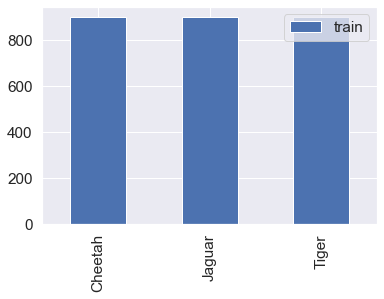

In [8]:
import pandas as pd

_, train_counts = np.unique(train_labels, return_counts=True)

pd.DataFrame({'train': train_counts}, 
             index=class_names
            ).plot.bar()
plt.show()

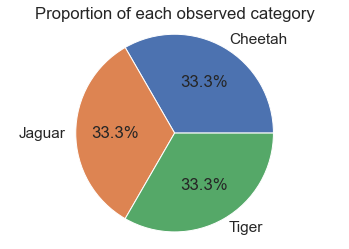

In [10]:
plt.pie(train_counts,
        explode=(0, 0, 0) , 
        labels=class_names,
        autopct='%1.1f%%')
plt.axis('equal')
plt.title('Proportion of each observed category')
plt.show()

##Scale the Data

In [11]:
train_images = train_images / 255.0 
test_images = test_images / 255.0

In [12]:
def display_random_image(class_names, images, labels):
    """
        Display a random image from the images array and its correspond label from the labels array.
    """
    
    index = np.random.randint(images.shape[0])
    plt.figure()
    plt.imshow(images[index])
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.title('Image #{} : '.format(index) + class_names[labels[index]])
    plt.show()

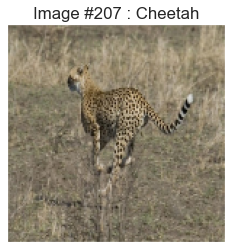

In [13]:
display_random_image(class_names, train_images, train_labels)

##Create Simple Model

In [14]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (150, 150, 3)), 
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(3, activation=tf.nn.softmax)
])

In [15]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [16]:
history = model.fit(train_images, train_labels, batch_size=128, epochs=20, validation_split = 0.2)

Epoch 1/20
17/17 [==============================] - 26s 1s/step - loss: 1.8458 - accuracy: 0.3431 - val_loss: 1.0589 - val_accuracy: 0.3370
Epoch 2/20
17/17 [==============================] - 23s 1s/step - loss: 1.0112 - accuracy: 0.4102 - val_loss: 0.9462 - val_accuracy: 0.5981
Epoch 3/20
17/17 [==============================] - 24s 1s/step - loss: 0.8431 - accuracy: 0.6426 - val_loss: 0.7732 - val_accuracy: 0.6981
Epoch 4/20
17/17 [==============================] - 23s 1s/step - loss: 0.6473 - accuracy: 0.7412 - val_loss: 0.6741 - val_accuracy: 0.7111
Epoch 5/20
17/17 [==============================] - 23s 1s/step - loss: 0.5304 - accuracy: 0.8032 - val_loss: 0.6345 - val_accuracy: 0.7370
Epoch 6/20
17/17 [==============================] - 23s 1s/step - loss: 0.3873 - accuracy: 0.8755 - val_loss: 0.6360 - val_accuracy: 0.7519
Epoch 7/20
17/17 [==============================] - 23s 1s/step - loss: 0.2905 - accuracy: 0.9000 - val_loss: 0.5505 - val_accuracy: 0.7741
Epoch 8/20
17/17 [==

In [17]:
model.save("Tiger_Court_Model.h5py")

INFO:tensorflow:Assets written to: Tiger_Court_Model.h5py\assets
